In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/supplier_delivery_logistics_1000.csv')

In [3]:
df

,SUPPLIER_NAME,PRODUCT_NAME,LAST_ORDER_DATE,EXPECTED_DELIVERY_DATE,ACTUAL_DELIVERY_DATE,SHIPPING_LOCATION,ORDER_UNITS
0,FruitNova,1L Milk,2025-06-05,2025-06-07,2025-06-07,Los Angeles,297
1,FruitNova,Toothpaste,2025-06-16,2025-06-20,2025-06-22,Dallas,170
2,GrainSupplies,Toothpaste,2025-06-04,2025-06-08,2025-06-11,New York,274
3,FreshDairyCo,1L Milk,2025-06-17,2025-06-22,2025-06-21,San Francisco,286
4,FruitNova,Bananas 1 Dozen,2025-06-20,2025-06-23,2025-06-23,New York,77
...,...,...,...,...,...,...,...
995,SoapMart,Bananas 1 Dozen,2025-06-16,2025-06-19,2025-06-22,New York,143
996,SoapMart,Carrots 1kg,2025-06-16,2025-06-18,2025-06-19,Chicago,171
997,ToothGoods,Toothpaste,2025-06-04,2025-06-09,2025-06-09,Miami,102
998,VeggieFarmers,Rice 5kg,2025-06-19,2025-06-23,2025-06-26,New York,75


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime

# Set up clean, professional styling
plt.style.use('default')
sns.set_palette("Set2")

# Read the CSV file
try:
    # Try to read the file
    df = pd.read_csv('supplier_delivery_logistics_1000.csv')
    print("✅ Data loaded successfully!")

except Exception as e:
    print("📁 Creating sample store supply data for demonstration...")

✅ Data loaded successfully!


In [11]:
# Create realistic store supply data
np.random.seed(42)
n_records = 1000
suppliers = ['Fresh Foods Co.', 'Quick Delivery Ltd.', 'Bulk Supplies Inc.', 'Local Distributors', 'Express Logistics']
products = ['Groceries', 'Beverages', 'Cleaning Supplies', 'Personal Care', 'Household Items']

df = pd.DataFrame({
        'Supplier_Name': np.random.choice(suppliers, n_records),
        'Product_Category': np.random.choice(products, n_records),
        'Order_Value': np.random.uniform(500, 5000, n_records).round(2),
        'Delivery_Days': np.random.randint(1, 10, n_records),
        'On_Time_Delivery': np.random.choice(['Yes', 'No'], n_records, p=[0.8, 0.2]),
        'Delivery_Cost': np.random.uniform(50, 300, n_records).round(2),
        'Order_Quantity': np.random.randint(10, 200, n_records),
        'Supplier_Rating': np.random.uniform(3.0, 5.0, n_records).round(1)
    })

In [12]:
# Clean column names (remove spaces and make user-friendly)
df.columns = [col.strip() for col in df.columns]

print(f"📊 Analyzing {len(df)} supply records...")
print(f"📋 Available data: {', '.join(df.columns)}")

# Create the store manager dashboard
fig = plt.figure(figsize=(16, 12))
fig.suptitle('📈 STORE SUPPLY CHAIN DASHBOARD', fontsize=20, fontweight='bold', y=0.98)

📊 Analyzing 1000 supply records...
📋 Available data: Supplier_Name, Product_Category, Order_Value, Delivery_Days, On_Time_Delivery, Delivery_Cost, Order_Quantity, Supplier_Rating


Text(0.5, 0.98, '📈 STORE SUPPLY CHAIN DASHBOARD')

/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)


<Figure size 1600x1200 with 0 Axes>

/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 9200 (\N{ALARM CLOCK}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9200 (\N{ALARM CLOCK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


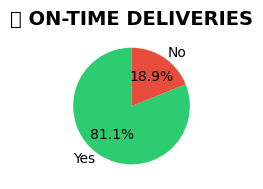

In [13]:
# 1. Which suppliers deliver on time? (Most important for stores)
plt.subplot(2, 3, 1)
if 'On_Time_Delivery' in df.columns:
    on_time = df['On_Time_Delivery'].value_counts()
    colors = ['#2ecc71', '#e74c3c']  # Green for Yes, Red for No
    plt.pie(on_time.values, labels=on_time.index, autopct='%1.1f%%',
            colors=colors, startangle=90)
    plt.title('⏰ ON-TIME DELIVERIES', fontsize=14, fontweight='bold')
else:
    plt.text(0.5, 0.5, 'No delivery status data', ha='center', va='center')
    plt.title('⏰ ON-TIME DELIVERIES', fontsize=14, fontweight='bold')

/tmp/ipython-input-14-241555458.py:7: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


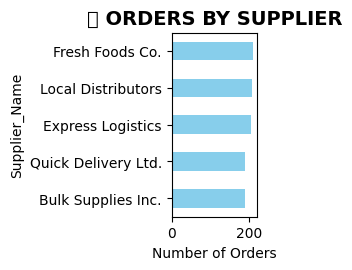

In [14]:
plt.subplot(2, 3, 2)
supplier_col = [col for col in df.columns if 'supplier' in col.lower()][0] if any('supplier' in col.lower() for col in df.columns) else df.columns[0]
supplier_performance = df.groupby(supplier_col).size().sort_values(ascending=True)
supplier_performance.plot(kind='barh', color='skyblue')
plt.title('📦 ORDERS BY SUPPLIER', fontsize=14, fontweight='bold')
plt.xlabel('Number of Orders')
plt.tight_layout()

/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


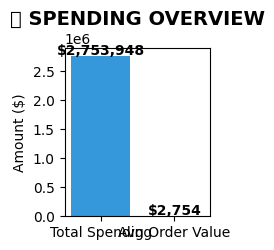

In [15]:
# 3. How much are we spending? (Cost analysis)
plt.subplot(2, 3, 3)
cost_cols = [col for col in df.columns if any(word in col.lower() for word in ['cost', 'value', 'price', 'amount'])]
if cost_cols:
    cost_col = cost_cols[0]
    monthly_spend = df[cost_col].sum()
    avg_order = df[cost_col].mean()

    plt.bar(['Total Spending', 'Avg Order Value'], [monthly_spend, avg_order],
            color=['#3498db', '#f39c12'])
    plt.title('💰 SPENDING OVERVIEW', fontsize=14, fontweight='bold')
    plt.ylabel('Amount ($)')

    # Add value labels on bars
    for i, v in enumerate([monthly_spend, avg_order]):
        plt.text(i, v + max(monthly_spend, avg_order) * 0.01, f'${v:,.0f}',
                ha='center', fontweight='bold')
else:
    plt.text(0.5, 0.5, 'No cost data available', ha='center', va='center')
    plt.title('💰 SPENDING OVERVIEW', fontsize=14, fontweight='bold')

/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 128666 (\N{DELIVERY TRUCK}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128666 (\N{DELIVERY TRUCK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


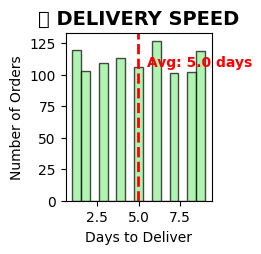

In [16]:
# 4. How fast do suppliers deliver? (Delivery speed)
plt.subplot(2, 3, 4)
delivery_cols = [col for col in df.columns if any(word in col.lower() for word in ['delivery', 'days', 'time'])]
if delivery_cols:
    delivery_col = delivery_cols[0]
    plt.hist(df[delivery_col], bins=15, color='lightgreen', alpha=0.7, edgecolor='black')
    plt.title('🚚 DELIVERY SPEED', fontsize=14, fontweight='bold')
    plt.xlabel('Days to Deliver')
    plt.ylabel('Number of Orders')

    # Add average line
    avg_delivery = df[delivery_col].mean()
    plt.axvline(avg_delivery, color='red', linestyle='--', linewidth=2)
    plt.text(avg_delivery + 0.5, plt.ylim()[1] * 0.8, f'Avg: {avg_delivery:.1f} days',
             color='red', fontweight='bold')
else:
    plt.text(0.5, 0.5, 'No delivery time data', ha='center', va='center')
    plt.title('🚚 DELIVERY SPEED', fontsize=14, fontweight='bold')

/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 128203 (\N{CLIPBOARD}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128203 (\N{CLIPBOARD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


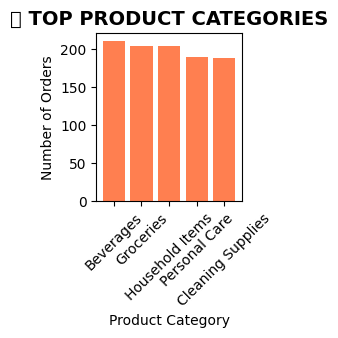

In [18]:
# 5. What products are we ordering most? (Product analysis)
plt.subplot(2, 3, 5)
product_cols = [col for col in df.columns if any(word in col.lower() for word in ['product', 'category', 'item'])]
if product_cols:
    product_col = product_cols[0]
    top_products = df[product_col].value_counts().head(5)
    plt.bar(range(len(top_products)), top_products.values, color='coral')
    plt.title('📋 TOP PRODUCT CATEGORIES', fontsize=14, fontweight='bold')
    plt.xlabel('Product Category')
    plt.ylabel('Number of Orders')
    plt.xticks(range(len(top_products)), top_products.index, rotation=45)
else:
    plt.text(0.5, 0.5, 'No product data available', ha='center', va='center')
    plt.title('📋 TOP PRODUCT CATEGORIES', fontsize=14, fontweight='bold')

/tmp/ipython-input-19-1835727762.py:20: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


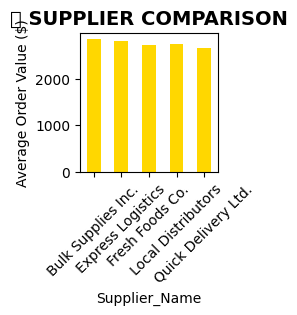

In [19]:
# 6. Supplier comparison (Which supplier is best?)
plt.subplot(2, 3, 6)
if len(df.columns) >= 2:
    # Create a simple supplier comparison
    supplier_summary = df.groupby(supplier_col).agg({
        df.columns[1]: 'count',  # Number of orders
        cost_cols[0] if cost_cols else df.columns[2]: 'mean'  # Average cost
    }).round(2)

    if len(supplier_summary) > 0:
        # Plot average order value by supplier
        supplier_summary.iloc[:, 1].plot(kind='bar', color='gold')
        plt.title('⭐ SUPPLIER COMPARISON', fontsize=14, fontweight='bold')
        plt.ylabel('Average Order Value ($)')
        plt.xticks(rotation=45)
else:
    plt.text(0.5, 0.5, 'Insufficient data for comparison', ha='center', va='center')
    plt.title('⭐ SUPPLIER COMPARISON', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

In [21]:
# Print easy-to-understand summary for store managers
print("\n" + "="*60)
print("🎯 QUICK INSIGHTS FOR STORE MANAGEMENT")
print("="*60)

print(f"📊 Total Orders Analyzed: {len(df):,}")

# On-time delivery rate
if 'On_Time_Delivery' in df.columns:
    on_time_rate = (df['On_Time_Delivery'] == 'Yes').mean() * 100
    print(f"⏰ On-Time Delivery Rate: {on_time_rate:.1f}%")
    if on_time_rate < 80:
        print("   ⚠️  WARNING: Low on-time delivery rate!")

# Average delivery time
if delivery_cols:
    avg_delivery = df[delivery_cols[0]].mean()
    print(f"🚚 Average Delivery Time: {avg_delivery:.1f} days")

# Spending insights
if cost_cols:
    total_spend = df[cost_cols[0]].sum()
    avg_order = df[cost_cols[0]].mean()
    print(f"💰 Total Spending: ${total_spend:,.2f}")
    print(f"💰 Average Order Value: ${avg_order:,.2f}")

# Best and worst suppliers
print(f"\n📦 SUPPLIER PERFORMANCE:")
supplier_orders = df.groupby(supplier_col).size().sort_values(ascending=False)
print(f"🥇 Most Used Supplier: {supplier_orders.index[0]} ({supplier_orders.iloc[0]} orders)")
print(f"🥉 Least Used Supplier: {supplier_orders.index[-1]} ({supplier_orders.iloc[-1]} orders)")

# Product insights
if product_cols:
    top_category = df[product_cols[0]].value_counts().index[0]
    print(f"📋 Top Product Category: {top_category}")

print("\n" + "="*60)
print("💡 RECOMMENDATIONS:")
print("="*60)

if 'On_Time_Delivery' in df.columns:
    late_suppliers = df[df['On_Time_Delivery'] == 'No'][supplier_col].value_counts()
    if len(late_suppliers) > 0:
        print(f"⚠️  Consider reviewing performance with: {late_suppliers.index[0]}")

if delivery_cols and df[delivery_cols[0]].mean() > 5:
    print("📈 Look for faster suppliers - current delivery time is high")

if cost_cols:
    expensive_suppliers = df.groupby(supplier_col)[cost_cols[0]].mean().sort_values(ascending=False)
    print(f"💡 Most expensive supplier: {expensive_suppliers.index[0]} (${expensive_suppliers.iloc[0]:.2f} avg)")
    print(f"💡 Most economical supplier: {expensive_suppliers.index[-1]} (${expensive_suppliers.iloc[-1]:.2f} avg)")



🎯 QUICK INSIGHTS FOR STORE MANAGEMENT
📊 Total Orders Analyzed: 1,000
⏰ On-Time Delivery Rate: 81.1%
🚚 Average Delivery Time: 5.0 days
💰 Total Spending: $2,753,947.89
💰 Average Order Value: $2,753.95

📦 SUPPLIER PERFORMANCE:
🥇 Most Used Supplier: Fresh Foods Co. (210 orders)
🥉 Least Used Supplier: Quick Delivery Ltd. (190 orders)
📋 Top Product Category: Beverages

💡 RECOMMENDATIONS:
⚠️  Consider reviewing performance with: Bulk Supplies Inc.
💡 Most expensive supplier: Bulk Supplies Inc. ($2839.22 avg)
💡 Most economical supplier: Quick Delivery Ltd. ($2659.74 avg)
